### Unit 2, Lessons 2 and 3.     Naive Bayes classifier analysis, evaluation and iteration
### Prepared by Robin Fladebo     December 2018

#### Assignment

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

#### Data source

A dataset of sentiment labelled sentences. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read in data from Yelp
feedback_tmp = pd.read_csv('../Datafiles/sentiment_labelled_sentences/yelp_labelled.txt', encoding='UTF-8', delimiter= '\t', header=None)
feedback_tmp.columns = ['sentence', 'score']

In [13]:
# Read in data from Amazon
feedback_amzn = pd.read_csv('../Datafiles/sentiment_labelled_sentences/amazon_cells_labelled.txt', encoding='UTF-8', delimiter= '\t', header=None)
feedback_amzn.columns = ['sentence', 'score']

Define keywords (features) and set boolean indicator for presence of each keyword for the Yelp data.

In [14]:
keywords = ['nice', 'perfect', 'quick', 'delight', 'love', 'great', 'prompt', 'recommend', 'amazing', 'terrific', 'good', 'delicious', 'friendly', 'fresh', 'tasty','fantastic', 'excellent', 'clean']

for word in keywords:
    feedback_tmp[str(word)] = feedback_tmp.sentence.str.contains(
        ' ' + str(word),
        case=False
    )
    
feedback_tmp['score'] = (feedback_tmp['score'] == 1)

Using the same set of keywords (features) as was used for the Yelp data, set boolean indicator for presence of each keyword for the Amazon data.

In [15]:

for word in keywords:
    feedback_amzn[str(word)] = feedback_amzn.sentence.str.contains(
        ' ' + str(word),
        case=False
    )
    
feedback_amzn['score'] = (feedback_amzn['score'] == 1)

### Review keyword selection for correlation

#### Check for keywords that are correlated with another in the Yelp data

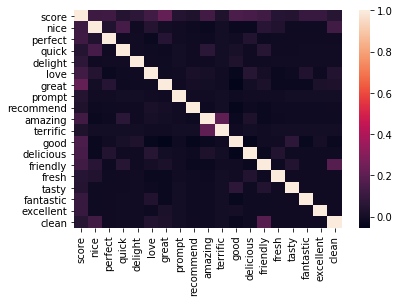

In [16]:
sns.heatmap(feedback_tmp.corr())

#### Check for keywords that are correlated with another in the Amazon data

The keywords "perfect" and "fantastic" are somewhat correlated with each other in the Amazon data.

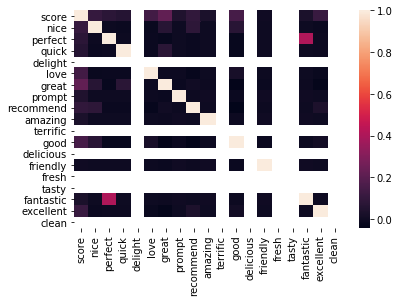

In [17]:
sns.heatmap(feedback_amzn.corr())

### Fitting classifiers

#### Classifying with the Yelp data

In [18]:
data = feedback_tmp[keywords]
target = feedback_tmp['score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Score: {}".format(1.00 - ((target != y_pred).sum()/data.shape[0])))

Number of mislabeled points out of a total 1000 points : 286
Score: 0.714


In [19]:
#Use pandas concat to add the model results to the analysis data frame
tmpdf=pd.DataFrame({'target':target, 'y_pred':y_pred})
tmpdf2=pd.concat([feedback_tmp.sentence, data, tmpdf], axis=1)

#### Initial Yelp classifier iterations

Identifying words to add to improve the score for the Yelp data by reviewing errors. 

I have decided to change 'loved' to 'love' (an obvious change). 

This output shows several false positives (examples: "not good" and "not tasty"). This is a weakness of the naive Bayes modelling technique.

In [20]:
tmpdf2[(target != y_pred) & (target==True)]

,sentence,nice,perfect,quick,delight,love,great,prompt,recommend,amazing,...,good,delicious,friendly,fresh,tasty,fantastic,excellent,clean,target,y_pred
13,"I tried the Cape Cod ravoli, chicken,with cran...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16,Highly recommended.,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
22,Service is also cute.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
23,I could care less... The interior is just beau...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
24,So they performed.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
30,"Also there are combos like a burger, fries, an...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
32,I found this place by accident and I could not...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,"Overall, I like this place a lot.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,The only redeeming quality of the restaurant w...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
40,The shrimp tender and moist.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


#### Classifying with the Amazon data

In [21]:
data_a = feedback_amzn[keywords]
target_a = feedback_amzn['score']

# Instantiate the model for the Amazon data and store it in a new variable.
bnb_amzn = BernoulliNB()

# Fit our model to the data.
bnb_amzn.fit(data_a, target_a)

# Classify, storing the result in a new variable.
y_pred_a = bnb_amzn.predict(data_a)

# Display our results.
print("Number of mislabeled points out of a total {} points in the Amazon data: {}".format(
    data_a.shape[0],
    (target_a != y_pred_a).sum()
))
print("Score for the Amazon data: {}".format(1.00 - ((target_a != y_pred_a).sum()/data_a.shape[0])))

Number of mislabeled points out of a total 1000 points in the Amazon data: 353
Score for the Amazon data: 0.647


In [13]:
#Use pandas concat to add the model results to the analysis data frame for the Amazon data
tmpdf_a=pd.DataFrame({'target':target_a, 'y_pred':y_pred_a})
tmpdf2_a=pd.concat([feedback_amzn.sentence, data_a, tmpdf_a], axis=1)

In [14]:
tmpdf2_a[(target_a != y_pred_a) & (target_a==True)]

,sentence,nice,perfect,quick,delight,love,great,prompt,recommend,amazing,...,good,delicious,friendly,fresh,tasty,fantastic,excellent,clean,target,y_pred
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11,He was very impressed when going from the orig...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
23,I have yet to run this new battery below two b...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
25,Great Pocket PC / phone combination.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
26,I've owned this phone for 7 months now and can...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
31,This product is ideal for people like me whose...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,It has kept up very well.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
42,Nice headset priced right.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
44,Excellent bluetooth headset.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Cross validation and confusion matrix

#### Use a single holdout group to check the model with Yelp data

In [23]:
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With a single 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With a single 30% Holdout: 0.7233333333333334
Testing on Sample: 0.714


#### Use cross-validation with four folds to check the Yelp model

In this notebook, I've coded cross-validation rather than relying on SKLearn. I am using four folds or divisions in the data.

The first step is to randomize the data before constructing the folds.

In [55]:
feedback_tmp = feedback_tmp.reindex(np.random.permutation(feedback_tmp.index))

In [56]:
fold_1 = feedback_tmp.iloc[0:250]
fold_2 = feedback_tmp.iloc[250:500]
fold_3 = feedback_tmp.iloc[500:750]
fold_4 = feedback_tmp.iloc[750:]
no_fold_1 = feedback_tmp.iloc[250:]
no_fold_2 = pd.concat([fold_1, fold_3, fold_4], axis=0)
no_fold_3 = pd.concat([fold_1, fold_2, fold_4], axis=0)
no_fold_4 = feedback_tmp.iloc[0:750]

In [57]:
train_frames = [no_fold_1, no_fold_2, no_fold_3, no_fold_4]
test_frames = [fold_1, fold_2, fold_3, fold_4]

In [58]:
def run_model(df_name, run_type):
    data_xv = df_name[keywords]
    target_xv = df_name['score']
    # Instantiate our model and store it in a new variable.
    bnb_xv = BernoulliNB()
    # Fit our model to the data.
    bnb_xv.fit(data_xv, target_xv)
    y_pred_xv = bnb.predict(data_xv) 
    # Record results
    source = df_name
    misses = (target_xv != y_pred_xv).sum()
    score = 1.00 - (misses/data_xv.shape[0])
    results_tmp = {'Misses': misses, 'Score': score, 'Run type': run_type}
    print(results_tmp)
    return(misses,score,run_type)

In [59]:
misses_list = []
score_list = []
run_type_list = []

for index, df_name in enumerate(test_frames):
    x, y, z = run_model(df_name, 'test')
    misses_list.append(x)
    score_list.append(y)
    run_type_list.append(z)
    

{'Misses': 77, 'Score': 0.692, 'Run type': 'test'}
{'Misses': 75, 'Score': 0.7, 'Run type': 'test'}
{'Misses': 72, 'Score': 0.712, 'Run type': 'test'}
{'Misses': 62, 'Score': 0.752, 'Run type': 'test'}


In [60]:
for index, df_name in enumerate(train_frames):
    x, y, z = run_model(df_name, 'train')
    misses_list.append(x)
    score_list.append(y)
    run_type_list.append(z)

metrics = []
metrics = pd.DataFrame({'Misses': misses_list, 'Score': score_list, 'Run type': run_type_list})

{'Misses': 209, 'Score': 0.7213333333333334, 'Run type': 'train'}
{'Misses': 211, 'Score': 0.7186666666666667, 'Run type': 'train'}
{'Misses': 214, 'Score': 0.7146666666666667, 'Run type': 'train'}
{'Misses': 224, 'Score': 0.7013333333333334, 'Run type': 'train'}


In [61]:
print(metrics)

   Misses     Score Run type
0      77  0.692000     test
1      75  0.700000     test
2      72  0.712000     test
3      62  0.752000     test
4     209  0.721333    train
5     211  0.718667    train
6     214  0.714667    train
7     224  0.701333    train


#### Use SKLearn to generate cross-validation scores. The initial model score is 0.714

In [62]:
#The initial model score is .688
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.7 , 0.71, 0.74, 0.69, 0.67, 0.68, 0.75, 0.69, 0.76])

#### Confusion matrix

In [48]:
#For iteration 1, Yelp data
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(target, y_pred).ravel()
print("True negatives: {}\nFalse positives: {}\nFalse negatives: {}\nTrue positives: {}".format(tn, fp, fn, tp))

True negatives: 457
False positives: 43
False negatives: 243
True positives: 257


### Discussion

I ran the classifier seven times, each with a single change or addition to the features; that is, changing or adding to the list of keywords. Before making a change or addition to the features, I reviewed the correlation matrix. I did not detect correlation with any of the new features. The summarized results are as follows.

Iteration 1: Change the keyword 'loved' to 'love'. Previous number of errors: 321. Errors after this change: 312, down 9 errors. Keep this change.

After reviewing the confusion matrix, I decided to work on reducing the number of false negatives.

Iteration 2: Add the word 'delight'. Previous number of errors: 312. Errors after this change: 308.
Iterations 3, 4: Add the words 'yummy' and 'pleasure' one at a time. Each resulted in dropping errors by only one. Drop these changes.
Iteration 5: Add the word 'quick'. Errors down 5, to 303. Score 0.697.
Iteration 6: Add the word 'perfect'. Errors down 10, to 293. Score 0.707
Iteration 7: Add the word 'nice'. Errors down 7, to 286. Score now 0.714.

I compared model results for Yelp data with Amazon data, using the same set of keywords. I was surprised that the scores were relatively close, because the Yelp data focuses on experiences related to food, while Amazon comments relate to merchandise purchases. Three food-related terms did not appear in the Amazon data; those words are 'delicious', 'fresh' and 'tasty'. Three other terms that improved the Yelp model did not appear in the Amazon data; those were 'delight','terrific' and 'clean'.

Cross-validation testing results were that the largest variance was 0.06 between two of four test runs. The largest variance was 0.02 between two of four training runs. 
 
The classifier that performed the best resulted from adding features to reduce false negatives. 
 
The features that seemed most impactful to performance were those that reflected positive comments, but were not often combined with a negating word (i.e., words such as 'delicious', because 'not delicious' is not commonly used).